In [10]:
import numpy as np
np.random.seed(10)
mselist=[]
for i in range(10):
    d1=50
    d2=40
    mu_10,mu_11 = np.random.rand(d1),np.random.rand(d1)
    mu_20,mu_21 = np.random.rand(d2),np.random.rand(d2)
    n1=10000
    n2=50

    X1_0=np.random.multivariate_normal(mu_10,np.eye(d1) ,n1)
    X1_1=np.random.multivariate_normal(mu_11,np.eye(d1) ,n1)
    X2_0=np.random.multivariate_normal(mu_20,np.eye(d2) ,n1)
    X2_1=np.random.multivariate_normal(mu_21,np.eye(d2) ,n1)
    X1=np.concatenate([X1_0,X1_1],0)
    X2=np.concatenate([X2_0,X2_1],0)
    X=np.concatenate([X1,X2],1)
    X1_0_te=np.random.multivariate_normal(mu_10,np.eye(d1) ,n2)
    X1_1_te=np.random.multivariate_normal(mu_11,np.eye(d1) ,n2)
    X2_0_te=np.random.multivariate_normal(mu_20,np.eye(d2) ,n2)
    X2_1_te=np.random.multivariate_normal(mu_21,np.eye(d2) ,n2)
    X1_te=np.concatenate([X1_0_te,X1_1_te],0)
    X2_te=np.concatenate([X2_0_te,X2_1_te],0)
    X_te=np.concatenate([X1_te,X2_te],1)
    y = np.concatenate([np.zeros([n1,1]),np.ones([n1,1])],0)
    y_te=np.concatenate([np.zeros([n2,1]),np.ones([n2,1])],0)

    W_hat_X1= np.linalg.inv(X1_te.T@X1_te)@X1_te.T@y_te
    mse1=np.mean((y-X1@W_hat_X1)**2)

    W_hat_X2= np.linalg.inv(X2_te.T@X2_te)@X2_te.T@y_te
    mse2=np.mean((y-X2@W_hat_X2)**2)

    W_hat_X= np.linalg.inv(X_te.T@X_te)@X_te.T@y_te
    mse3=np.mean((y-X@W_hat_X)**2)

    B=(np.linalg.inv(X1.T@X1)@X1.T@X2)
    Psi_te=X1_te@B
    W_hat_Psi= np.linalg.inv(Psi_te.T@Psi_te)@Psi_te.T@y_te
    mse4=np.mean((y-X1@B@W_hat_Psi)**2)
    mselist.append([mse1,mse2,mse3,mse4])

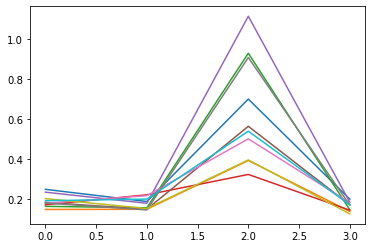

In [12]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.plot(mselist[i])
